In [105]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import kneighbors_graph
from sklearn import datasets,manifold
from scipy import sparse

In [144]:
def my_laplace(X,y,n_neighbors,n_component,i,j,normalize=False):
    m=X.shape[0]
    W = kneighbors_graph(X, n_neighbors,mode='distance')
    W=(W+W.T)*0.5
    D=sparse.diags(np.asarray(W.sum(axis=1)).flatten())
    if normalize==True:
        L=np.eye(m)-np.sqrt(sparse.linalg.inv(D))@W@np.sqrt(sparse.linalg.inv(D))
    else:
        L=D-W
    [yl,YL]=sparse.linalg.eigsh(L,k=n_component,which='SM')
    plt.figure(figsize=(9,8))
    plt.scatter(YL[:,i],YL[:,j],c=y,cmap=plt.cm.Set1)
    plt.show()

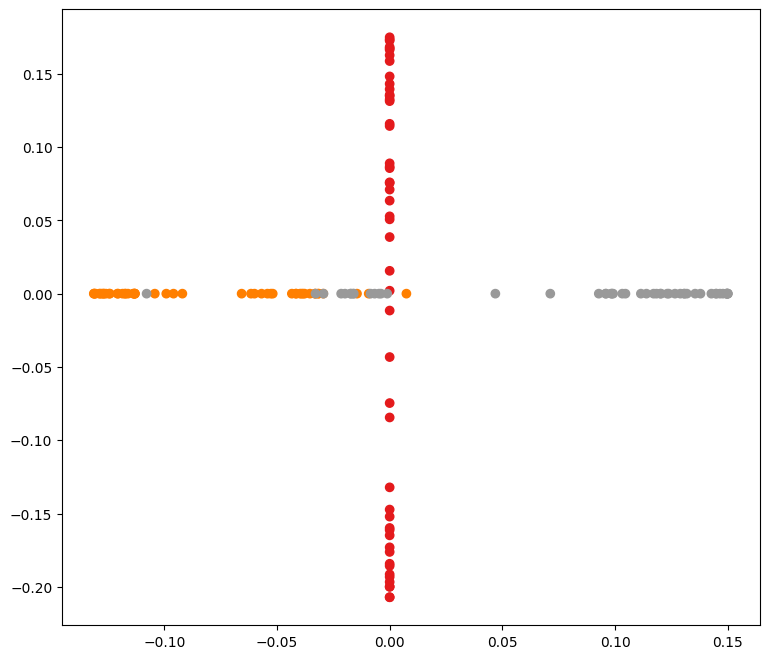

In [148]:
iris = datasets.load_iris()
y = iris.target
my_laplace(iris.data,y,8,4,2,3,False)

/usr/local/lib/python3.10/dist-packages/scipy/sparse/linalg/_matfuncs.py:76: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  Ainv = spsolve(A, I)
/usr/local/lib/python3.10/dist-packages/scipy/sparse/linalg/_matfuncs.py:76: SparseEfficiencyWarning: spsolve is more efficient when sparse b is in the CSC matrix format
  Ainv = spsolve(A, I)


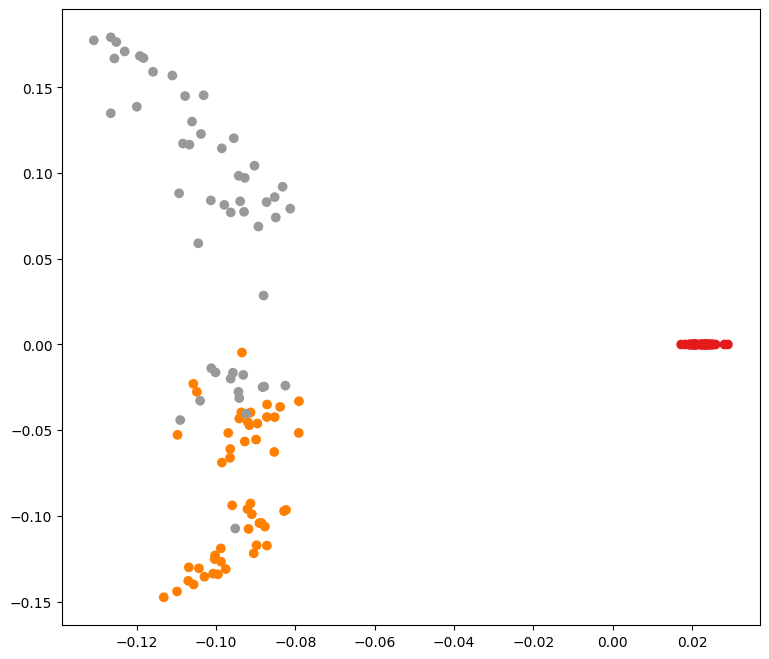

In [146]:
iris = datasets.load_iris()
y = iris.target
my_laplace(iris.data,y,8,3,1,2,True)

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


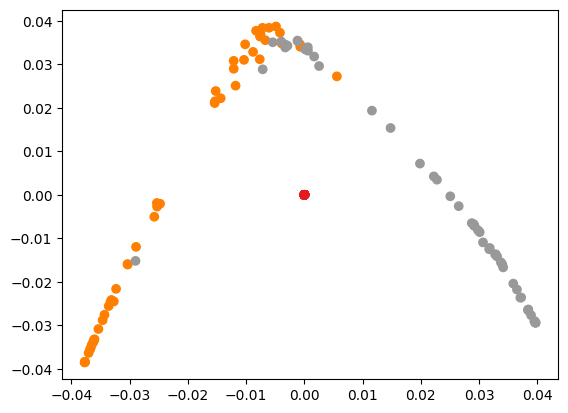

In [147]:
model=manifold.SpectralEmbedding(n_components=8)
X_transformed = model.fit_transform(iris.data)
plt.figure()
plt.scatter(X_transformed[:,1],X_transformed[:,2],c=y,cmap=plt.cm.Set1)